<p><img alt="Colaborat" style="height: 220px;" src="https://github.com/CienciaDatosUdea/001_DataSetFundCienciaDatos/blob/main/semestre2024-2/lab/lab02/Escudo-UdeA.svg.png?raw=true" align="left" hspace="10px" vspace="0px" width="200" heigth="200"></p>


# Fundamentos en ciencias de datos


# Proyecto 2: Cambio Climático - Temperaturas y Precipitación

¡En este proyecto, investigarás datos sobre el cambio climático, o los cambios a largo plazo en las temperaturas y los patrones climáticos!

### Logística

**Fecha límite.** Este proyecto se debe entregar  el miércoles 26 antes de las **11:00pm**.

**Autor Notebook**: Hernán Salinas - Profesor encargado

**Soluciones propuestas por**: Camilo Rafael Pérez Chaves

Para comenzar, cargaremos las bibliotecas `datascience`, `numpy` y `matplotlib`. Estaremos trabajando con varios conjuntos de datos: `city_info.csv`, que contiene información sobre diferentes ciudades; `phoenix.csv`, que presenta datos climáticos como temperatura máxima y mínima, así como precipitación; y `southwest.csv`, que incluye la precipitación total por año en varias ciudades.

In [ ]:
# Run this cell to set up the notebook, but please don't change it.
from datascience import *
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore')

## Parte 1: Temperaturas
En el siguiente análisis, investigaremos uno de los problemas más destacados del siglo XXI: **el cambio climático**. Aunque los detalles científicos del clima están fuera del alcance de este curso, podemos comenzar a aprender sobre el cambio climático analizando los registros públicos de temperatura y precipitación en diferentes ciudades a lo largo del tiempo.

Analizaremos una colección de mediciones históricas diarias de temperatura y precipitación de estaciones meteorológicas en 210 ciudades de los EE.UU. El conjunto de datos fue compilado por Yuchuan Lai y David Dzombak [1]. Una descripción de los datos de los autores originales y los datos en sí están disponibles [aquí](https://kilthub.cmu.edu/articles/dataset/Compiled_daily_temperature_and_precipitation_data_for_the_U_S_cities/7890488).

[1] Lai, Yuchuan; Dzombak, David (2019): Conjunto de datos históricos diarios de temperatura y precipitación para 210 ciudades de EE.UU. Universidad Carnegie Mellon. Conjunto de Datos.

### Sección 1: Ciudades
Ejecuta la siguiente celda para cargar la información sobre las `cities` y mostrar una vista previa de las primeras filas.

In [ ]:
cities = Table.read_table('https://raw.githubusercontent.com/camilorp5/curso_ciencia_de_datos/refs/heads/main/proy_02/DB/city_info.csv', index_col=0)
cities.show(3)

Name,ID,Lat,Lon,Stn.Name,Stn.stDate,Stn.edDate
Lander,USW00024021,42.8153,-108.726,LANDER WBO,1892-01-01,1946-05-28
Lander,USW00024021,42.8153,-108.726,LANDER HUNT FIELD,1946-05-29,2021-12-31
Cheyenne,USW00024018,41.1519,-104.806,CHEYENNE WBO,1871-01-01,1935-08-31


La tabla `cities` tiene una fila por estación meteorológica y las siguientes columnas:

1. `"Name"`: El nombre de la ciudad de EE.UU.
2. `"ID"`: El identificador único para la ciudad de EE.UU.
3. `"Lat"`: La latitud de la ciudad de EE.UU. (medida en grados de latitud)
4. `"Lon"`: La longitud de la ciudad de EE.UU. (medida en grados de longitud)
5. `"Stn.Name"`: El nombre de la estación meteorológica donde se recopilaron los datos
6. `"Stn.stDate"`: Una cadena que representa la fecha de la primera grabación en esa estación particular
7. `"Stn.edDate"`: Una cadena que representa la fecha de la última grabación en esa estación particular


En la celda siguiente, se creará un diagrama de dispersión que muestre la latitud y longitud de las ciudades de la tabla cities. Las ciudades del norte se ubicarán en la parte superior y las del oeste a la izquierda. Se podrán representar puntos repetidos. La latitud corresponde a las distancias al norte o sur del ecuador y la longitud a las distancias al este o oeste del meridiano de Greenwich.

Text(0, 0.5, 'Latitud')

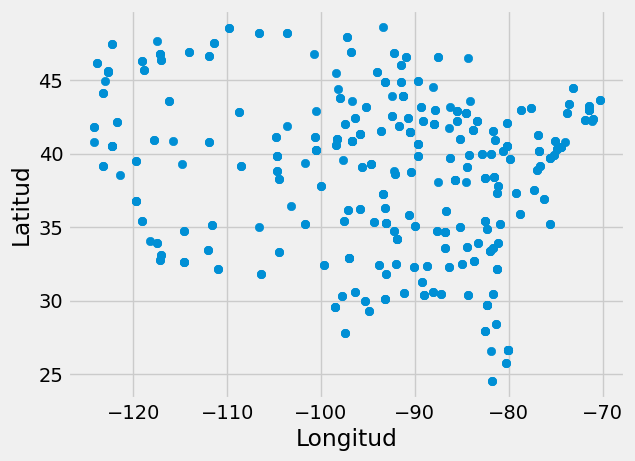

In [ ]:
x = cities.select('Lat', 'Lon').column(0)
y = cities.select('Lat', 'Lon').column(1)
plt.scatter(y,x)
plt.xlabel('Longitud')
plt.ylabel('Latitud')

Estas ciudades se encuentran dentro del continente de los Estados Unidos, por lo que la forma general del país debería ser visible en tu gráfico. La forma aparecerá distorsionada en comparación con la mayoría de los mapas por dos razones: el diagrama de dispersión es cuadrado, aunque Estados Unidos es más ancho que alto, y este diagrama de dispersión es una [proyección equirectangular](https://es.wikipedia.org/wiki/Proyecci%C3%B3n_equirectangular) de la Tierra esférica. Un mapa geográfico de los mismos datos utiliza la común [proyección Pseudo-Mercator](https://es.wikipedia.org/wiki/Proyecci%C3%B3n_Web_Mercator).

> *Nota:* Si esta visualización no se carga en tu dispositivo, por favor, visualiza una versión en línea [aquí](https://github.jonathanferrari.com/static/city_map.html).

In [ ]:
Marker.map_table(cities.select('Lat', 'Lon', 'Name').relabeled('Name', 'labels'))

In [ ]:
## Veamos que la tabla cities contiene ciudades repetidas, entonces veamos
## ¿cuántas ciudades únicas hay?
num_unique_cities = len(cities.group('ID').column('ID'))
print(f"There are {num_unique_cities} unique cities that appear within our dataset.")

There are 210 unique cities that appear within our dataset.


Para investigar más a fondo, será útil determinar en qué región de los Estados Unidos se encuentra cada ciudad: Noreste, Noroeste, Sureste o Suroeste. Para nuestros propósitos, utilizaremos los siguientes límites geográficos:

<img src= "https://raw.githubusercontent.com/camilorp5/curso_ciencia_de_datos/refs/heads/main/proy_02/DB/mapa_coo_usa.png" alt="Mapa de Coordenadas de EE.UU." width="600"/>

1. Una estación se encuentra en la región `"Northeast"` si su latitud es mayor o igual a 40 grados y su longitud es mayor o igual a -100 grados.
2. Una estación se encuentra en la región `"Northwest"` si su latitud es mayor o igual a 40 grados y su longitud es menor de -100 grados.
3. Una estación se encuentra en la región `"Southeast"` si su latitud es menor de 40 grados y su longitud es mayor o igual a -100 grados.
4. Una estación se encuentra en la región `"Southwest"` si su latitud es menor de 40 grados y su longitud es menor de -100 grados.

In [ ]:
#Diseñamos el código que clasifica cada ciudad dependiendo los parámetros
def coordinates_to_region(lat, lon):
    return ('Northeast' if lat >= 40 and lon >= -100 else
            'Northwest' if lat >= 40 and lon < -100 else
            'Southeast' if lat < 40 and lon >= -100 else
            'Southwest')

In [ ]:
regions_array = cities.apply(coordinates_to_region, 'Lat','Lon')
cities = cities.with_column('Region', regions_array)
cities.show(5)

Name,ID,Lat,Lon,Stn.Name,Stn.stDate,Stn.edDate,Region
Lander,USW00024021,42.8153,-108.726,LANDER WBO,1892-01-01,1946-05-28,Northwest
Lander,USW00024021,42.8153,-108.726,LANDER HUNT FIELD,1946-05-29,2021-12-31,Northwest
Cheyenne,USW00024018,41.1519,-104.806,CHEYENNE WBO,1871-01-01,1935-08-31,Northwest
Cheyenne,USW00024018,41.1519,-104.806,CHEYENNE MUNICIPAL ARPT,1935-09-01,2021-12-31,Northwest
Wausau,USW00014897,44.9258,-89.6256,Wausau Record Herald,1896-01-01,1941-12-31,Northeast


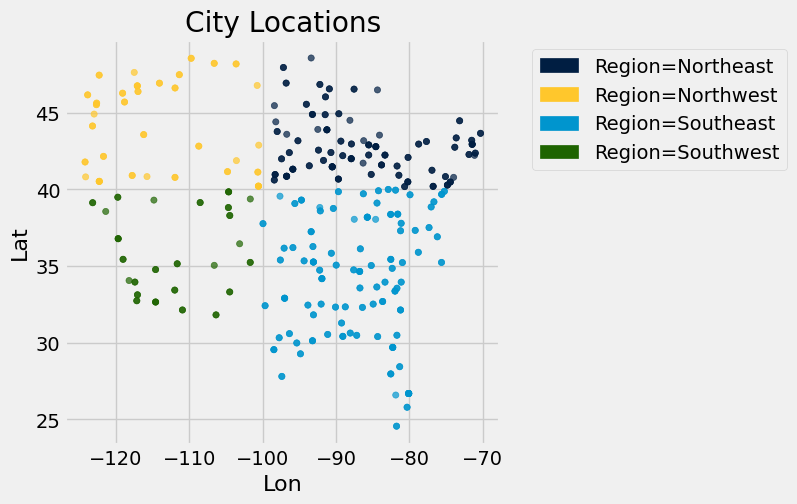

In [ ]:
# Ahora veamos la distinción por colores de cada una de las regiones
cities.scatter("Lon", "Lat", group="Region")
plt.title("City Locations");

Ahora creamos una tabla cities_nearest con las mismas columnas que cities y una columna extra llamada "Nearest", que indicará la ciudad más cercana en una región diferente. Para calcular la distancia, se usará la fórmula de la raíz cuadrada de las diferencias de latitud y longitud, aplicando la función distancia y el método apply para evitar bucles for.

In [ ]:
cities = cities.with_column('Region', cities.apply(lambda row: coordinates_to_region(row.item('Lat'), row.item('Lon'))))

def nearest_city(row):
    city_lat, city_lon, city_region = row.item('Lat'), row.item('Lon'), row.item('Region')
    different_region_cities = cities.where('Region', are.not_equal_to(city_region))

    distances = np.sqrt((different_region_cities.column('Lat') - city_lat) ** 2 +
                        (different_region_cities.column('Lon') - city_lon) ** 2)

    nearest_index = np.argmin(distances)
    return different_region_cities.column('Name').item(nearest_index)

cities_nearest = cities.with_column('Nearest', cities.apply(nearest_city))
cities_nearest.show(5)

Name,ID,Lat,Lon,Stn.Name,Stn.stDate,Stn.edDate,Region,Nearest
Lander,USW00024021,42.8153,-108.726,LANDER WBO,1892-01-01,1946-05-28,Northwest,GrandJunction
Lander,USW00024021,42.8153,-108.726,LANDER HUNT FIELD,1946-05-29,2021-12-31,Northwest,GrandJunction
Cheyenne,USW00024018,41.1519,-104.806,CHEYENNE WBO,1871-01-01,1935-08-31,Northwest,Denver
Cheyenne,USW00024018,41.1519,-104.806,CHEYENNE MUNICIPAL ARPT,1935-09-01,2021-12-31,Northwest,Denver
Wausau,USW00014897,44.9258,-89.6256,Wausau Record Herald,1896-01-01,1941-12-31,Northeast,Springfield


### Sección 2: Bienvenidos a Phoenix, Arizona

Phoenix es la capital del estado de Arizona y es conocida por su clima cálido y soleado. En esta sección, analizaremos el clima de Phoenix utilizando los datos de los archivos suministrados. Nos enfocaremos en las temperaturas máximas, mínimas y las precipitaciones diarias para comprender mejor las características climáticas de la ciudad a lo largo del tiempo.

Cada ciudad tiene un archivo CSV diferente lleno de mediciones diarias de temperatura y precipitación. El archivo para Phoenix, Arizona, se incluye en este proyecto como `phoenix.csv`. Los archivos para otras ciudades se pueden descargar [aquí](https://kilthub.cmu.edu/articles/dataset/Compiled_daily_temperature_and_precipitation_data_for_the_U_S_cities/7890488) emparejándolos con el ID de la ciudad en la tabla `ciudades`.

Dado que Phoenix se encuentra en el borde superior del Desierto de Sonora, tiene temperaturas bastante impresionantes.

Ejecuta la siguiente celda para cargar la tabla `phoenix`. Esta tabla tiene una fila por día y las siguientes columnas:

1. `"Date"`: La fecha (una cadena de texto) que representa la fecha del registro en formato **YYYY-MM-DD**
2. `"tmax"`: La temperatura máxima del día (°C)
3. `"tmin"`: La temperatura mínima del día (°C)
4. `"prcp"`: La precipitación registrada para el día (pulgadas)

In [ ]:
phoenix = Table.read_table("https://raw.githubusercontent.com/camilorp5/curso_ciencia_de_datos/refs/heads/main/proy_02/DB/phoenix.csv", index_col=0)
phoenix = phoenix.with_columns(
    "tmax", (phoenix.column('tmax') - 32) * (5/9),
    "tmin", (phoenix.column('tmin') - 32) * (5/9)
)
# (Opcional) verificar los primeros registros transformados
phoenix.show(5)

Date,tmax,tmin,prcp
1896-01-01,18.8889,-1.11111,0
1896-01-02,17.7778,-1.11111,0
1896-01-03,20,-1.11111,0
1896-01-04,20.5556,1.11111,0
1896-01-05,21.1111,7.77778,0


Asigna a la variable `largest_2010_range_date` la fecha correspondiente al **mayor rango de temperatura** registrado en Phoenix, Arizona, en cualquier día comprendido entre el **1 de enero de 2010 y el 31 de diciembre de 2010.**

Para ello, construye una tabla llamada phoenix_with_ranges_2010, filtrando la tabla original de Phoenix para incluir únicamente los registros correspondientes a los días del año 2010. Además, agrega una columna adicional que indique el **rango de temperatura** de cada día, calculado como la diferencia entre la temperatura máxima y la mínima.

**Tu respuesta debe ser una cadena en formato** "`AAAA-MM-DD`" para la variable `largest_2010_range_date` . Puedes utilizar tantas líneas de código como sea necesario.

Sugerencia:

Para filtrar los valores de una columna que contengan cierto texto, utiliza el predicado `are`. correspondiente de la [Hoja de referencia de Python](https://www.data8.org/fa23/reference/#tablewhere-predicates).

No es necesario reasignar la variable phoenix; todas las operaciones deben realizarse sobre la tabla `phoenix_with_ranges_2010.`

In [ ]:
phoenix_with_ranges_2010 = phoenix.where('Date', are.above_or_equal_to('2010-01-01')).where('Date', are.below_or_equal_to('2010-12-31'))
largest_2010_range_date = phoenix_with_ranges_2010.sort('tmax', descending=True)
largest_2010_range_date = largest_2010_range_date.column('Date')[0]

In [ ]:
print(largest_2010_range_date + ' es la fecha con mayor rango de temperatura')

2010-07-01 es la fecha con mayor rango de temperatura


In [ ]:
phoenix.where("Date", largest_2010_range_date)

Date,tmax,tmin,prcp
2010-07-01,45.5556,31.6667,0


Veamos que podemos extraer tanto el año como el mes de una fecha dada usando la librería `calendar`

In [ ]:
import calendar

def extract_year_from_date(date):
    return int(date[:4])

def extract_month_from_date(date):
    month = date[5:7]
    return f'{month} ({calendar.month_abbr[int(date[5:7])]})'


print('2022-04-01 tiene el año', extract_year_from_date('2022-04-01'),
      'y el mes', extract_month_from_date('2022-04-01'))

2022-04-01 tiene el año 2022 y el mes 04 (Apr)


Ahora añadimos dos nuevas columnas a la tabla *phoenix*:
*   "Year", que contendrá el año como número entero
*   "Month", que incluirá el mes

como una cadena de texto (por ejemplo, "04 (Abr)") para cada día.

In [ ]:
years_array = phoenix.apply(extract_year_from_date,'Date' )
months_array = phoenix.apply(extract_month_from_date,'Date')
phoenix = phoenix.with_columns('Year', years_array, 'Month', months_array)
phoenix.show(5)

Date,tmax,tmin,prcp,Year,Month
1896-01-01,18.8889,-1.11111,0,1896,01 (Jan)
1896-01-02,17.7778,-1.11111,0,1896,01 (Jan)
1896-01-03,20,-1.11111,0,1896,01 (Jan)
1896-01-04,20.5556,1.11111,0,1896,01 (Jan)
1896-01-05,21.1111,7.77778,0,1896,01 (Jan)


Se crea un gráfico de líneas superpuestas utilizando la tabla *phoenix*, que muestra la temperatura máxima promedio y la temperatura mínima promedio para cada año entre 1900 y 2020 (inclusive).

In [ ]:
phoenix_mean = phoenix.group('Year', np.mean).where('Year', are.between_or_equal_to(1900, 2020))
phoenix_mean

Year,Date mean,tmax mean,tmin mean,prcp mean,Month mean
1900,,29.5769,13.5677,0.0147671,
1901,,29.5906,13.3805,0.0133425,
1902,,29.2831,13.2861,0.0188493,
1903,,29.0426,12.9528,0.0181096,
1904,,29.5765,13.0616,0.0152186,
1905,,28.0837,13.6971,0.0540548,
1906,,28.624,13.3288,0.0234247,
1907,,28.4688,13.4353,0.0223836,
1908,,28.2665,12.9463,0.0293989,
1909,,28.0944,12.8721,0.0169041,


Text(0, 0.5, 'T(C)')

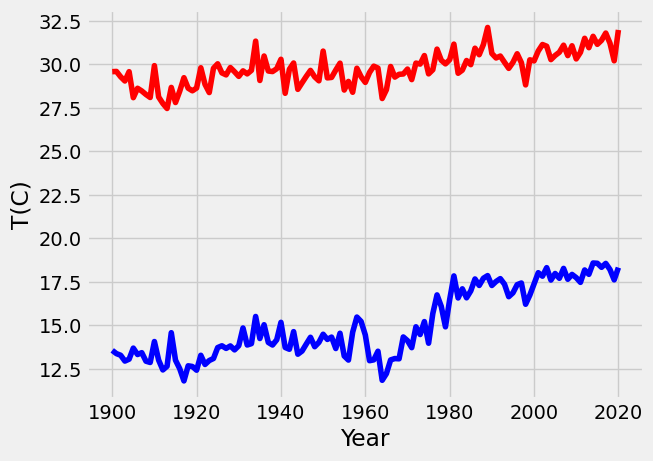

In [ ]:
plt.plot(phoenix_mean.column('Year'), phoenix_mean.column('tmax mean'), color='red')
plt.plot(phoenix_mean.column('Year'), phoenix_mean.column('tmin mean'), color='blue')
plt.xlabel("Year")
plt.ylabel("T(C)")

Notemos que el aumento de la temperatura puede estar relacionado con factores como la emisión de gases de efecto invernadero, la evolución del sector industria y demás factores que ocurren después de los años 60.

Calcular un promedio de las temperaturas durante todo el año puede enmascarar ciertos efectos del cambio climático. Por ejemplo, si los veranos se calientan pero los inviernos se enfrían, el promedio anual podría no mostrar grandes variaciones. Ahora vamos a analizar cómo han cambiado las temperaturas máximas mensuales promedio a lo largo del tiempo en Phoenix.

In [ ]:
def period(year):
    "Output if a year is in the Past, Present, or Other."
    if 1900 <= year <= 1960:
        return "Past"
    elif 2019 <= year <= 2021:
        return "Present"
    else:
        return "Other"
periodos = phoenix.apply(period, 'Year')
phoenix_periodos = phoenix.with_column('período', periodos)
monthly = phoenix_periodos.pivot('período','Month',values='tmax',collect = np.mean).drop('Other')
diff = monthly.column('Present') - monthly.column('Past')
monthly_increases = monthly.with_column('Increase', diff)
monthly_increases.show()

Month,Past,Present,Increase
01 (Jan),18.3424,19.9062,1.56377
02 (Feb),20.4714,20.6588,0.187424
03 (Mar),23.6944,24.4331,0.738694
04 (Apr),28.1345,31.3333,3.19885
05 (May),33.0166,34.7616,1.74502
06 (Jun),38.4256,40.9636,2.53796
07 (Jul),39.777,41.8029,2.02585
08 (Aug),38.5645,41.8799,3.31538
09 (Sep),36.493,38.4654,1.97241
10 (Oct),30.4433,32.3148,1.87149


#### Febrero en Phoenix

Los valores de la columna `"Past"` se promedian a lo largo de muchas décadas, por lo que son estimaciones fiables de las temperaturas máximas promedio en esos meses antes de los efectos del cambio climático moderno. Sin embargo, la columna `"Present"` se basa únicamente en observaciones de tres años. Febrero, el mes más corto, tiene la menor cantidad de observaciones totales: solo 85 días. Ejecuta la celda a continuación para ver esto.

In [ ]:
feb_present = phoenix.where('Year', are.between_or_equal_to(2019, 2021)).where('Month', '02 (Feb)')
print(f"Veamos cuántas observaciones fueron realizadas en febrero: {feb_present.num_rows} observaciones")

Veamos cuántas observaciones fueron realizadas en febrero: 85 observaciones


In [ ]:
print(f"Diferencia de temperatura en Febrero: {monthly_increases.row(1).item('Increase')}")

Diferencia de temperatura en Febrero: 0.1874235165143645


Se calcula el límite inferior de un intervalo de confianza para la media poblacional utilizando remuestreos de bootstrap. Esto se hace para estimar con mayor precisión la temperatura máxima promedio de febrero, considerando que las observaciones pueden ser vistas como muestras aleatorias de una distribución climática desconocida. El objetivo es comparar este límite inferior con el promedio histórico de las temperaturas, para verificar si ha habido un aumento en las temperaturas máximas de febrero en Phoenix.

In [ ]:
def ci_lower(t, level):
    '''Calcula un límite inferior de un intervalo de confianza del level%
    para el promedio de la población, donde la columna 0 de la Tabla t contiene una muestra.
    '''
    stats = make_array()
    for k in np.arange(5000):
        stat = np.mean(t.sample(with_replacement=True).column(0))
        stats = np.append(stats, stat)
    return percentile(100 - level, stats)

# Llama a ci_lower sobre las temperaturas máximas de febrero en la actualidad
# para encontrar el límite inferior de un intervalo de confianza del 99%.
feb_present_ci = ci_lower(feb_present.select('tmax'), 99)
feb_present_ci

19.561437908496735

#### Todos los meses
Ahora repetiremos el proceso de cálculo del límite inferior del intervalo de confianza del 99% para cada mes, comparándolo con el promedio histórico. Para cada mes, se imprime el nombre del mes, el promedio histórico y el límite inferior del intervalo de confianza para el promedio actual. El formato de salida es una línea por mes, siguiendo el mismo formato que el ejemplo de febrero proporcionado.

In [ ]:
comparisons = make_array()

# Tomamos los meses únicos desde los datos ya filtrados:
months = np.unique(monthly_increases.column("Month"))

for month in months:
    # Promedio observado en el período 'Past' para el mes actual:
    past_average = monthly_increases.where('Month', are.equal_to(month)).column('Past')[0]

    # Todas las observaciones actuales ('Present') para este mes:
    present_observations = ((phoenix_periodos.where('período', are.equal_to('Present'))).where('Month', are.equal_to(month))).select('tmax')

    # Límite inferior del intervalo de confianza del 99% sobre las observaciones actuales:
    present_lower_bound = ci_lower(present_observations, 99)

    # NO modificar desde aquí en adelante (código dado por el ejercicio):
    below = past_average < present_lower_bound
    if below:
        comparison = '{abajo}'
    else:
        comparison = '{arriba}'
    comparisons = np.append(comparisons, comparison)

    print('Para', month, 'el promedio pasado', round(past_average, 1),
      'está', comparison,
      'del límite inferior', round(present_lower_bound, 1),
      'del intervalo de confianza al 99% del promedio presente. \n')

Para 01 (Jan) el promedio pasado 18.3 está {abajo} del límite inferior 19.1 del intervalo de confianza al 99% del promedio presente. 

Para 02 (Feb) el promedio pasado 20.5 está {arriba} del límite inferior 19.6 del intervalo de confianza al 99% del promedio presente. 

Para 03 (Mar) el promedio pasado 23.7 está {arriba} del límite inferior 23.5 del intervalo de confianza al 99% del promedio presente. 

Para 04 (Apr) el promedio pasado 28.1 está {abajo} del límite inferior 30.3 del intervalo de confianza al 99% del promedio presente. 

Para 05 (May) el promedio pasado 33.0 está {abajo} del límite inferior 33.7 del intervalo de confianza al 99% del promedio presente. 

Para 06 (Jun) el promedio pasado 38.4 está {abajo} del límite inferior 40.2 del intervalo de confianza al 99% del promedio presente. 

Para 07 (Jul) el promedio pasado 39.8 está {abajo} del límite inferior 40.9 del intervalo de confianza al 99% del promedio presente. 

Para 08 (Aug) el promedio pasado 38.6 está {abajo} de

Podemos notar un patrón de comportamiento anual, veamos que el promedio es mayor para los meses que están entre abril y octubre, esto coincide con los meses de verano de cada año.

---


## Parte 2: Sequía
De acuerdo con la [Agencia de Protección Ambiental de los Estados Unidos](https://www.epa.gov/climate-indicators/southwest), "Grandes porciones del Suroeste han experimentado condiciones de sequía desde que comenzaron los registros semanales del Monitor de Sequía en el año 2000. Durante períodos prolongados de 2002 a 2005 y de 2012 a 2020, casi toda la región estuvo anormalmente seca o incluso más seca."

Evaluar el impacto de la sequía es un desafío utilizando solo datos a nivel de ciudad, porque gran parte del agua que utilizan las personas es transportada desde otros lugares. Sin embargo, exploraremos los datos disponibles para ver qué podemos aprender.

Primero, echemos un vistazo a los datos de precipitación en la región del Suroeste. El archivo `southwest.csv` contiene la precipitación total anual para 13 ciudades en el suroeste de los Estados Unidos, registrada para cada año desde 1960 hasta 2021. Este conjunto de datos se ha consolidado a partir de datos diarios e incluye solo las ciudades del Suroeste del conjunto de datos original que tienen registros de precipitación consistentes desde 1960.

In [ ]:
southwest = Table.read_table('https://raw.githubusercontent.com/camilorp5/curso_ciencia_de_datos/refs/heads/main/proy_02/DB/southwest.csv')
southwest.show(5)

City,Year,Total Precipitation
Albuquerque,1960,8.12
Albuquerque,1961,8.87
Albuquerque,1962,5.39
Albuquerque,1963,7.47
Albuquerque,1964,7.44


La tabla `totals` tiene una fila para cada año en orden cronológico con su respectivo año y el total de precipitaciones por año.



In [ ]:
totals= southwest.select('Year', 'Total Precipitation').group('Year', sum).relabel('Total Precipitation sum', 'Precipitation')
totals.show(5)

Year,Precipitation
1960,149.58
1961,134.82
1962,130.41
1963,132.18
1964,123.41


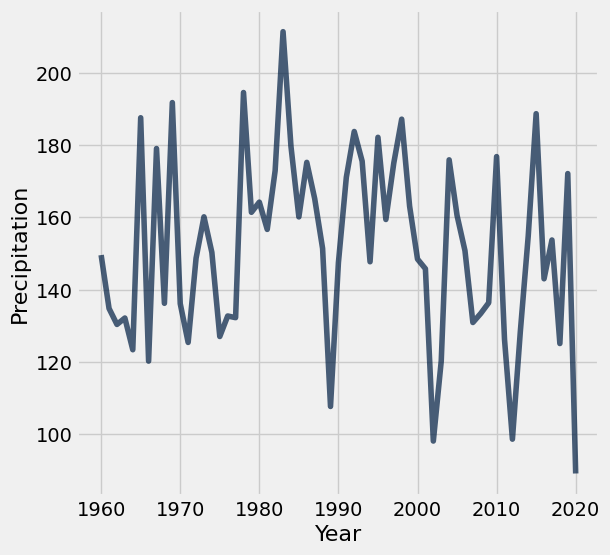

In [ ]:
## Así luce la distribución de las precipitaciones a los largo del tiempo
totals.plot("Year", "Precipitation")

Este gráfico no es muy revelador. Cada año presenta una cantidad diferente de precipitación y hay bastante variabilidad entre los años, como si la precipitación de cada año fuera un resultado aleatorio de una distribución de posibles resultados.

¿Podría ser que estas llamadas "condiciones de sequía" de 2002-2005 y 2012-2020 puedan explicarse por azar? En otras palabras, ¿podría ser que las cantidades anuales de precipitación en el Suroeste durante estos años de sequía son como **resultados aleatorios de la misma distribución subyacente** que en otros años? Tal vez no ha cambiado nada en los patrones de precipitación de la Tierra, y el suroeste de EE.UU. simplemente experimentó algunos años secos muy seguidos.

Para evaluar esta idea, realicemos una prueba A/B en la que **la precipitación total de cada año** es un resultado, y la condición es **si el año está o no en el período de sequía según la EPA**.

Esta función `drought_label` diferencia entre los años de sequía (drought), tal como se describe en la declaración de la EPA de EE. UU. mencionada anteriormente (2002-2005 y 2012-2020), y otros años. Cabe destacar que la etiqueta "Other" puede ser algo engañosa, ya que hubo otras sequías antes del año 2000, como la masiva [sequía de 1988](https://en.wikipedia.org/wiki/1988%E2%80%9390_North_American_drought) que afectó gran parte de EE. UU. Sin embargo, si nos interesa determinar si estos períodos de sequía más recientes (2002-2005 y 2012-2020) son *normales* o *anormales*, tiene sentido diferenciar los años de esta manera.

In [ ]:
def drought_label(n):
    """Return the label for an input year n."""
    if 2002 <= n <= 2005 or 2012 <= n <= 2020:
        return 'drought'
    else:
        return 'other'

In [ ]:
print('Hipótesis nula: Los años de sequía no son más secos que otros años; es decir, la precipitación media en años de sequía es igual a la precipitación media en otros años.')
print('Hipótesis alternativa: Los años de sequía son más secos que otros años; es decir, la precipitación media en años de sequía es menor que la precipitación media en otros años.')

Hipótesis nula: Los años de sequía no son más secos que otros años; es decir, la precipitación media en años de sequía es igual a la precipitación media en otros años.
Hipótesis alternativa: Los años de sequía son más secos que otros años; es decir, la precipitación media en años de sequía es menor que la precipitación media en otros años.


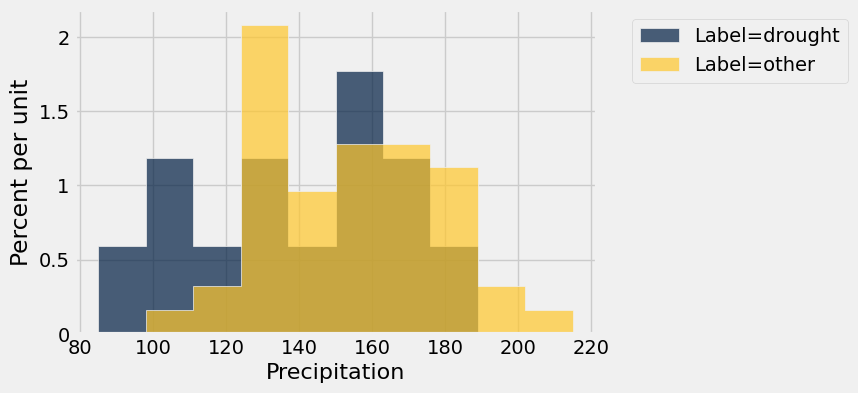

In [ ]:
drought = totals.with_columns(
    'Label', totals.apply(drought_label, 'Year')
)
bins = np.arange(85, 215+1, 13)
drought.hist('Precipitation', group='Label', bins=bins)


In [ ]:
drought.show(3)

Year,Precipitation,Label
1960,149.58,other
1961,134.82,other
1962,130.41,other


In [ ]:
drought.group('Label')

Label,count
drought,13
other,48


Para nuestra prueba A/B, usaremos la diferencia entre la precipitación promedio en los años de sequía y la precipitación promedio en otros años como nuestra estadística de prueba

In [ ]:
def test_statistic(t):
    drought_mean = t.where('Label', 'drought').column('Precipitation').mean()
    other_mean = t.where('Label', 'other').column('Precipitation').mean()
    return drought_mean - other_mean

observed_statistic = test_statistic(drought)
observed_statistic

-15.856714743589748

Ahora que hemos definido nuestras hipótesis y el estadístico de prueba, estamos listos para llevar a cabo nuestra prueba de hipótesis. Comenzaremos definiendo una función para simular el estadístico de prueba bajo la hipótesis nula y luego llamaremos a esa función 5000 veces para construir una distribución empírica bajo la hipótesis nula.

In [ ]:
def simulate_precipitation_null():
    shuffled_labels = drought.sample(with_replacement=False).column('Label')
    shuffled_table = drought.with_column('Shuffled Label', shuffled_labels)
    return test_statistic(shuffled_table.select('Shuffled Label', 'Precipitation').relabeled('Shuffled Label', 'Label'))

simulate_precipitation_null()

-6.6734775641025408

(-0.01, 0.05078043156127488)

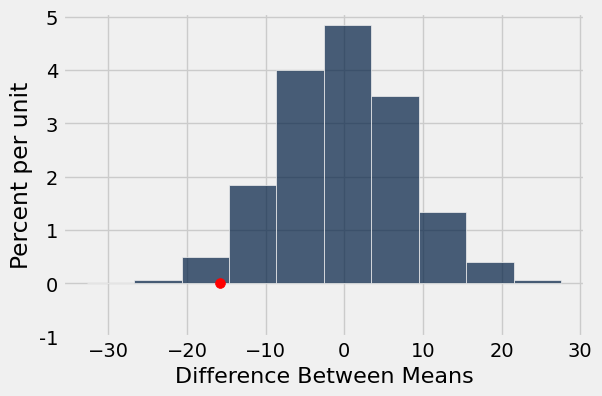

In [ ]:
repetitions = 5000
sampled_stats = make_array()

for i in np.arange(repetitions):
    sampled_stats = np.append(sampled_stats, simulate_precipitation_null())

Table().with_column('Difference Between Means', sampled_stats).hist()
plt.scatter(observed_statistic, 0, c="r", s=50)
plt.ylim(-0.01)

In [ ]:
precipitation_p_val = np.count_nonzero(sampled_stats <= observed_statistic) / repetitions
precipitation_p_val

0.0232

## Conclusión
La ciencia de datos juega un papel central en la investigación sobre el cambio climático, ya que es necesario realizar simulaciones masivas del clima terrestre para evaluar las implicaciones de los datos climáticos registrados por estaciones meteorológicas, satélites y otros sensores. [Berkeley Earth](http://berkeleyearth.org/data/) es una fuente común de datos para este tipo de proyectos.

En este proyecto, encontramos formas de aplicar nuestras técnicas de inferencia estadística que se basan en el muestreo aleatorio, incluso en situaciones en las que los datos no fueron generados aleatoriamente, sino por algún proceso natural complicado que parecía aleatorio. Hicimos suposiciones sobre la aleatoriedad y luego llegamos a conclusiones basadas en esas suposiciones. Se debe tener mucho cuidado al elegir supuestos que sean realistas, para que las conclusiones resultantes no sean engañosas. No obstante, hacer suposiciones sobre los datos puede ser útil cuando hacerlo permite aplicar técnicas de inferencia a situaciones novedosas.